In [1]:
#import and setup
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#imports
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import * 
import os, os.path
from os import listdir
import csv
from glob2 import glob

In [3]:
PATH = "data/plantseedlings/"
sz = 224
arch = resnet50
bs = 32

In [4]:
!ls {PATH}

sample_submission.csv  test  train


In [5]:
!ls {PATH}train

Black-grass  Common Chickweed  Loose Silky-bent   Shepherds Purse
Charlock     Common wheat      Maize		  Small-flowered Cranesbill
Cleavers     Fat Hen	       Scentless Mayweed  Sugar beet


In [6]:
files = !ls {PATH}train/Black-grass | head
files

['0050f38b3.png',
 '0183fdf68.png',
 '0260cffa8.png',
 '05eedce4d.png',
 '075d004bc.png',
 '078eae073.png',
 '082314602.png',
 '0ace21089.png',
 '0b228a6b8.png',
 '0b3e7a7a9.png']

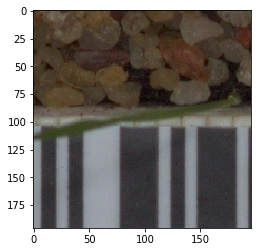

In [7]:
img = plt.imread(f'{PATH}train/Black-grass/{files[0]}')
plt.imshow(img)

In [8]:
img.shape

(196, 196, 3)

In [9]:
df = pd.DataFrame(columns = ['file', 'species'])

for image in glob('data/plantseedlings/train/**/*.png'):
    
    dir_ = image.split('/')
    file_, species = dir_[-1], dir_[-2]
    
    df = df.append({
        'file': file_,
        'species': species.replace(' ', '_')
    }, ignore_index = True)
    
df.to_csv(f'{PATH}label.csv', index = False)

In [10]:
df

,file,species
0,0bec204c7.png,Cleavers
1,d8597aa6a.png,Cleavers
2,7e8212b65.png,Cleavers
3,58b68b1ea.png,Cleavers
4,ef4a36963.png,Cleavers
5,3a4e50c40.png,Cleavers
6,0bdee2052.png,Cleavers
7,6cd9902c0.png,Cleavers
8,c5f57467a.png,Cleavers
9,d4803dca4.png,Cleavers


In [11]:
mv {PATH}train/**/*.png {PATH}train # this is to move the pictures into the train folder

In [12]:
rm -r {PATH}train/**/

In [13]:
!ls {PATH}train | head

0012f11c4.png
00268e97d.png
0026b7a30.png
003402ea0.png
00442de98.png
0050f38b3.png
005b4a3e3.png
006196e1c.png
00626e3be.png
006a4d00d.png
ls: write error: Broken pipe


In [14]:
len(np.unique(df.species))

12

In [15]:
np.random.seed(42)
n = len(df)
val_idxs = get_cv_idxs(n)
val_idxs

array([3817, 1075,  296, 2045, 1703, 4615, 3673, 3458, 1345, 2088, 4023, 4024, 1829, 3638,  179, 3328, 2827,
       4424, 1101, 2091, 4443, 2015, 4243, 2313,  230, 2880, 4150, 3201, 2989, 3938, 4260, 2804,   33, 3076,
       4060,  534,  776, 3827, 3168, 2303,  626, 4498, 3999,  350,  387, 3203, 3878, 3838, 2763, 1684,  915,
        960, 4582,  157, 2245, 3405, 1361, 2775, 2304, 2077,  354,  248, 1056, 2092, 1954, 2649, 3464, 3366,
        287, 2311, 2771,  315, 3930, 2402, 3277, 1503,  567,  393, 1417,  530,  199,  533, 2855, 2655, 4206,
       2004, 4378, 4351, 2897, 3380, 3590, 4030, 1770, 4562, 2181,  589, 3435,  802, 3641, 4434,   23, 2533,
       4027, 4515, 1907, 4489, 3339, 3403, 1721, 3161, 1822, 2526, 3317, 3058, 2665, 2440, 1813, 4088, 1170,
       3519,  691, 1871, 3285, 4401,  794, 1018,  544, 3032, 3410, 2281, 2939,  838, 2589, 2850,  414, 2167,
       3307, 4449, 4438, 4133, 1846, 1168,  555, 1482, 1746,   26, 1183, 1220, 4394, 4345, 4558,  538, 3135,
        465, 2750, 

In [16]:
tfms = tfms_from_model(arch, sz, aug_tfms = transforms_top_down, max_zoom = 1.1)

data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}label.csv', test_name = 'test', val_idxs = val_idxs, tfms = tfms, bs = bs)

In [17]:
len(data.trn_ds), len(data.test_ds)

(3800, 794)

In [18]:
len(data.classes), data.classes

(12,
 ['Black-grass',
  'Charlock',
  'Cleavers',
  'Common_Chickweed',
  'Common_wheat',
  'Fat_Hen',
  'Loose_Silky-bent',
  'Maize',
  'Scentless_Mayweed',
  'Shepherds_Purse',
  'Small-flowered_Cranesbill',
  'Sugar_beet'])

In [19]:
def get_data(sz):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}label.csv', test_name = 'test', num_workers = 4, val_idxs = val_idxs, tfms = tfms, bs = bs)
    
    return data if sz>300 else data.resize(340, 'tmp')

In [20]:
data = get_data(sz)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [21]:
learn = ConvLearner.pretrained(arch, data, precompute = True)

100%|██████████| 25/25 [00:02<00:00, 10.61it/s]


In [22]:
learn.fit(1e-2,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.276883   0.896208   0.699811  
    1      0.942312   0.767583   0.745076                    
    2      0.774167   0.762329   0.750284                    
    3      0.682412   0.650692   0.766004                    
    4      0.585926   0.725846   0.751326                    



[0.7258461, 0.7513257582982381]

In [23]:
#data augmentation, precompute is now turned off so we can augment hidden layers and fully connected layers
from sklearn import metrics

In [ ]:
data = get_data(sz)

In [25]:
learn = ConvLearner.pretrained(arch, data, precompute = True, ps = 0.5)

In [ ]:
learn.fit(1e-2,2)

In [ ]:
learn.precompute = False

In [26]:
#using learning rate finder to find optimal learning rate
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 96/119 [00:01<00:00, 58.01it/s, loss=10.9]


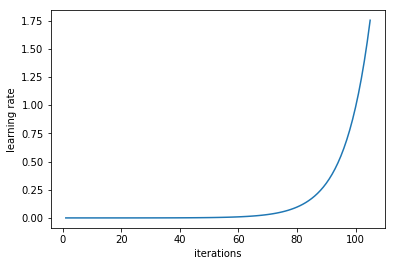

In [27]:
learn.sched.plot_lr()

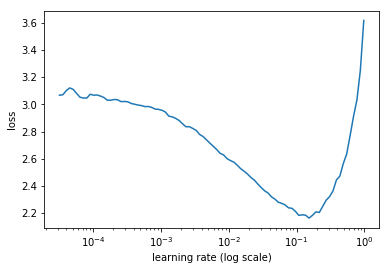

In [28]:
learn.sched.plot()

In [29]:
lr = 0.02

In [30]:
#optimal learning rate is roughly 10x before the minimum
learn.fit(lr, 5, cycle_len = 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.268557   0.876854   0.696212  
    1      0.99031    0.747103   0.740436                    
    2      0.857741   0.705673   0.758144                    



[0.7056729, 0.7581439395745595]

In [ ]:
learn.save('224_pre')

In [ ]:
learn.load('224_pre')s

In [31]:
learn.set_data(get_data(299))
learn.freeze()

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [32]:
#cycle_mult increases the duration (# of epochs) of our gradient descent before restarting (its exponential)
learn.fit(lr, 3, cycle_len = 1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.787553   0.715092   0.762121  
    1      0.744709   0.677765   0.773106                    
    2      0.549181   0.633273   0.790246                    
    3      0.642365   0.804605   0.742424                    
    4      0.588725   0.694619   0.770644                    
    5      0.448334   0.609478   0.799242                    
    6      0.366946   0.58715    0.794034                    



[0.58715, 0.7940340916315715]

In [33]:
lrs = np.array([lr/9,lr/3,lr/2])

In [34]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len = 1, cycle_mult = 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.868155   0.575232   0.790436  
    1      0.810598   0.577398   0.780587                    
    2      0.742974   0.535369   0.784659                    
    3      0.763449   0.583212   0.777462                    
    4      0.732555   0.525655   0.788826                    
    5      0.665442   0.525185   0.802936                    
    6      0.65765    0.517815   0.808144                    



[0.5178153, 0.8081439395745595]

In [35]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [36]:
accuracy_np(probs, y)

0.8452631578947368